# Machine Learning Classification Model for prediction of Titanic Survivors

## The folllowing is the model for the dataset on Titanic Survivors and the prediction of Titanic Survivors by using CatBoostClassifier. The train.csv dataset contains 892 entries and the test.csv dataset contains 418 entries to which the prediction is outputed into the gender_submission_pred.csv. You can follow through to see the operations performed on the data and the model built for the prediction.

## The first cell contains all the neccesary libraries that will be used in the model and all the preprocessing activities.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from catboost import CatBoostClassifier

## Getting the datasets


In [3]:
train = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\train.csv')
test = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\test.csv')
sub = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\gender_submission2.csv')

## Viewing the the train.csv dataset

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C



## Viewing the the test.csv dataset 


In [5]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,903,1,"Jones, Mr. Charles Cresson",male,46.0,0,0,694,26.0000,NaN,S
1,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
2,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
3,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
4,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Visualizing the distribution of Clicked values in the train.csv dataset

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


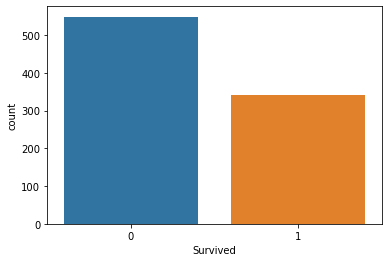

In [6]:
sns.countplot(train['Survived']);

## Finding out how many unique values are in each column in the train.csv dataset.

In [7]:
train.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

## Finding out the data types of the columns in the train.csv dataset for identification of Categorical data. The categorical data is identified by the datatype "object".

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Finding the null values in the train.csv dataset

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Finding the null values in the test.csv dataset

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Inputting missing values for both train.csv and test.csv datasets

In [11]:
train.fillna(-999, inplace=True)
test.fillna(-999,inplace=True)

## Checking if the missing values are filled in in train.csv

In [12]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Checking if the missing values are filled in in train.csv

In [13]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## First,we separate the train.csv dataset by getting a separate collection of the intended output for training the model. Dividing the train dataset to train the model. I also dropped some irrelevant data like 'Survived' which is being generated and "Name", "PassengerId" which is equivalent to a name, that doesn't repeat in the entire dataset, so it would not help in the model. "Cabin" had too many missing data points thus it was useless to the model since most of its values would have been filler/guesses.

In [16]:
X = train.drop(["Name","Cabin","PassengerId","Survived"], axis=1)
Y = train.Survived

## Dividing the train.csv dataset to train the model. You create a training dataset and a testing dataset from the train.csv dataset. The 0.20 signifies the division. So 80% for training and 20% for testing.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1234)

## Here, we are verifying the datatypes to ensure you get all the categorical data types. No preprocessing activities will be done on the categorical data, CatBoostClassifier will handle all of that to change the categorical data to numerical data to be used by the classification algorithm. 
## Categorical data in simple terms refers to data that refers to specific categories signified by words thus they can be converted to numeric data. words like "yes","no" and "maybe" are converted to 1, 2 and 3 instead. Machine Learning algorithms use mathematical calculations to calculate the predicitions behind the scenes so they need numbers to work, herego the "yes", "no" and "maybe" data is changed to numbers to be able to be used in the mathematical equation.

In [18]:
X.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

## This is the part where you identify all the categorical columns for CatBoost to do its thing.

In [19]:
cat_features = ["Sex","Ticket", "Embarked"]

## This is the part where the model is finally actualized in full. You need to tweek the values inside the model to make changes to the accuracy and other factors of the model.

In [20]:
model_cb = CatBoostClassifier(task_type = 'CPU', iterations = 1000, random_state = 2021, eval_metric='Accuracy', learning_rate = 0.3)

## This is the part where you fit the data you have been preparing to the model for training.

In [21]:
model_cb.fit(X_train, Y_train, cat_features = cat_features, plot = True, eval_set = (X_test, Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8132022	test: 0.8156425	best: 0.8156425 (0)	total: 188ms	remaining: 3m 7s
1:	learn: 0.8005618	test: 0.8379888	best: 0.8379888 (1)	total: 196ms	remaining: 1m 37s
2:	learn: 0.8089888	test: 0.8324022	best: 0.8379888 (1)	total: 223ms	remaining: 1m 14s
3:	learn: 0.8230337	test: 0.8156425	best: 0.8379888 (1)	total: 249ms	remaining: 1m 1s
4:	learn: 0.8272472	test: 0.8156425	best: 0.8379888 (1)	total: 273ms	remaining: 54.3s
5:	learn: 0.8328652	test: 0.8156425	best: 0.8379888 (1)	total: 288ms	remaining: 47.8s
6:	learn: 0.8356742	test: 0.7932961	best: 0.8379888 (1)	total: 304ms	remaining: 43.1s
7:	learn: 0.8342697	test: 0.7988827	best: 0.8379888 (1)	total: 327ms	remaining: 40.6s
8:	learn: 0.8426966	test: 0.8044693	best: 0.8379888 (1)	total: 348ms	remaining: 38.3s
9:	learn: 0.8441011	test: 0.8044693	best: 0.8379888 (1)	total: 373ms	remaining: 36.9s
10:	learn: 0.8511236	test: 0.8100559	best: 0.8379888 (1)	total: 399ms	remaining: 35.9s
11:	learn: 0.8609551	test: 0.8324022	best: 0.837988

99:	learn: 0.9648876	test: 0.8212291	best: 0.8491620 (22)	total: 2.44s	remaining: 22s
100:	learn: 0.9648876	test: 0.8379888	best: 0.8491620 (22)	total: 2.46s	remaining: 21.9s
101:	learn: 0.9648876	test: 0.8379888	best: 0.8491620 (22)	total: 2.48s	remaining: 21.8s
102:	learn: 0.9634831	test: 0.8324022	best: 0.8491620 (22)	total: 2.49s	remaining: 21.7s
103:	learn: 0.9662921	test: 0.8379888	best: 0.8491620 (22)	total: 2.5s	remaining: 21.6s
104:	learn: 0.9662921	test: 0.8379888	best: 0.8491620 (22)	total: 2.52s	remaining: 21.5s
105:	learn: 0.9662921	test: 0.8435754	best: 0.8491620 (22)	total: 2.54s	remaining: 21.4s
106:	learn: 0.9676966	test: 0.8379888	best: 0.8491620 (22)	total: 2.55s	remaining: 21.3s
107:	learn: 0.9676966	test: 0.8379888	best: 0.8491620 (22)	total: 2.57s	remaining: 21.3s
108:	learn: 0.9676966	test: 0.8379888	best: 0.8491620 (22)	total: 2.61s	remaining: 21.3s
109:	learn: 0.9676966	test: 0.8379888	best: 0.8491620 (22)	total: 2.63s	remaining: 21.2s
110:	learn: 0.9676966	tes

202:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.53s	remaining: 17.8s
203:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.55s	remaining: 17.7s
204:	learn: 0.9943820	test: 0.8379888	best: 0.8491620 (22)	total: 4.57s	remaining: 17.7s
205:	learn: 0.9943820	test: 0.8379888	best: 0.8491620 (22)	total: 4.58s	remaining: 17.7s
206:	learn: 0.9943820	test: 0.8379888	best: 0.8491620 (22)	total: 4.6s	remaining: 17.6s
207:	learn: 0.9943820	test: 0.8379888	best: 0.8491620 (22)	total: 4.62s	remaining: 17.6s
208:	learn: 0.9943820	test: 0.8379888	best: 0.8491620 (22)	total: 4.64s	remaining: 17.5s
209:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.65s	remaining: 17.5s
210:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.67s	remaining: 17.5s
211:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.69s	remaining: 17.4s
212:	learn: 0.9929775	test: 0.8379888	best: 0.8491620 (22)	total: 4.71s	remaining: 17.4s
213:	learn: 0.9929775	

304:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.58s	remaining: 15s
305:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.6s	remaining: 15s
306:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.63s	remaining: 15s
307:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.65s	remaining: 14.9s
308:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.67s	remaining: 14.9s
309:	learn: 1.0000000	test: 0.8435754	best: 0.8547486 (247)	total: 6.69s	remaining: 14.9s
310:	learn: 1.0000000	test: 0.8435754	best: 0.8547486 (247)	total: 6.71s	remaining: 14.9s
311:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.73s	remaining: 14.8s
312:	learn: 1.0000000	test: 0.8324022	best: 0.8547486 (247)	total: 6.75s	remaining: 14.8s
313:	learn: 1.0000000	test: 0.8324022	best: 0.8547486 (247)	total: 6.77s	remaining: 14.8s
314:	learn: 1.0000000	test: 0.8379888	best: 0.8547486 (247)	total: 6.82s	remaining: 14.8s
315:	learn: 1.000

398:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.51s	remaining: 12.8s
399:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.53s	remaining: 12.8s
400:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.55s	remaining: 12.8s
401:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.56s	remaining: 12.7s
402:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.58s	remaining: 12.7s
403:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.6s	remaining: 12.7s
404:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.61s	remaining: 12.7s
405:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.63s	remaining: 12.6s
406:	learn: 1.0000000	test: 0.8491620	best: 0.8547486 (247)	total: 8.65s	remaining: 12.6s
407:	learn: 1.0000000	test: 0.8435754	best: 0.8547486 (247)	total: 8.66s	remaining: 12.6s
408:	learn: 1.0000000	test: 0.8435754	best: 0.8547486 (247)	total: 8.68s	remaining: 12.5s
409:	learn:

494:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.4s	remaining: 10.6s
495:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.4s	remaining: 10.6s
496:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.4s	remaining: 10.6s
497:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.5s	remaining: 10.6s
498:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.5s	remaining: 10.5s
499:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.5s	remaining: 10.5s
500:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 10.5s	remaining: 10.5s
501:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 10.6s	remaining: 10.5s
502:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 10.6s	remaining: 10.4s
503:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 10.6s	remaining: 10.4s
504:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 10.6s	remaining: 10.4s
505:	learn

592:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.5s	remaining: 8.59s
593:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.5s	remaining: 8.57s
594:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.5s	remaining: 8.54s
595:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.6s	remaining: 8.52s
596:	learn: 1.0000000	test: 0.8324022	best: 0.8547486 (247)	total: 12.6s	remaining: 8.49s
597:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.6s	remaining: 8.47s
598:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.6s	remaining: 8.45s
599:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.6s	remaining: 8.42s
600:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.7s	remaining: 8.4s
601:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.7s	remaining: 8.38s
602:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 12.7s	remaining: 8.35s
603:	learn:

690:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.4s	remaining: 6.44s
691:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.4s	remaining: 6.42s
692:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.4s	remaining: 6.39s
693:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.4s	remaining: 6.37s
694:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.5s	remaining: 6.35s
695:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.5s	remaining: 6.33s
696:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.5s	remaining: 6.3s
697:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.5s	remaining: 6.28s
698:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.5s	remaining: 6.26s
699:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 14.6s	remaining: 6.24s
700:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 14.6s	remaining: 6.22s
701:	learn:

789:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.4s	remaining: 4.37s
790:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.5s	remaining: 4.35s
791:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.5s	remaining: 4.33s
792:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.5s	remaining: 4.31s
793:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.5s	remaining: 4.29s
794:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.5s	remaining: 4.26s
795:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.6s	remaining: 4.24s
796:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.6s	remaining: 4.22s
797:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.6s	remaining: 4.2s
798:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.6s	remaining: 4.18s
799:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 16.6s	remaining: 4.16s
800:	learn:

886:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.3s	remaining: 2.33s
887:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.3s	remaining: 2.31s
888:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.29s
889:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.27s
890:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.25s
891:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.23s
892:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.21s
893:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.4s	remaining: 2.19s
894:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.5s	remaining: 2.17s
895:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.5s	remaining: 2.14s
896:	learn: 1.0000000	test: 0.8156425	best: 0.8547486 (247)	total: 18.5s	remaining: 2.12s
897:	learn

985:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.2s	remaining: 286ms
986:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.2s	remaining: 266ms
987:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.2s	remaining: 245ms
988:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.2s	remaining: 225ms
989:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.2s	remaining: 204ms
990:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.3s	remaining: 184ms
991:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.3s	remaining: 163ms
992:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.3s	remaining: 143ms
993:	learn: 1.0000000	test: 0.8212291	best: 0.8547486 (247)	total: 20.3s	remaining: 123ms
994:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 20.3s	remaining: 102ms
995:	learn: 1.0000000	test: 0.8268156	best: 0.8547486 (247)	total: 20.4s	remaining: 81.7ms
996:	lear

## This is where you test the predictive capabilities of the model that you just trained.

In [22]:
y_pred = model_cb.predict(X_test)

## This is where you use the sklearn metrics library to get the F1 score of the model.

In [23]:
metrics.f1_score(Y_test, y_pred)

0.8115942028985507

## This is where you use the sklearn metrics library to get the Accuracy score of the model.

In [24]:
metrics.accuracy_score(Y_test, y_pred)

0.8547486033519553

## This is where you prepare the test.csv dataset by dropping the id and using the preprepared dataset skeleton in the repository. It is the one labeled gender_submission2.csv which is made by deleting all the columns except 'id' in the test.csv dataset and labeling a new column called Survived to contain the results. This is used to create the gender_submission_pred.csv since it has to match the id numbers in the test.csv dataset and has to be the same number of rows as the output.

In [25]:
test2 = test.drop(["Name","PassengerId","Cabin"], axis=1)

## Here we predict the results using the dataframe of the test.csv dataset. After that you create the prediction results using the test_solution.csv file.
## A Dataframe is just what you get when you read in a dataset like train.csv into the Jupyter notebook like we did in the second code-cell in this notebook.

In [26]:
result = model_cb.predict(test2)
sub['Survived'] = result
sub.to_csv('gender_submission_pred.csv', index = 0)

## Visualizing the distribution of Survived values in the gender_submission_pred.csv dataset

In [1]:
survivor_results = pd.read_csv(r'C:\Users\Admin\Downloads\Data Science projects\Machine Learning Classification Model for prediction of Titanic Survivors\gender_submission_pred.csv')
sns.countplot(clicked_results['Survived']);

NameError: name 'pd' is not defined